**Case Study : Fast Food McDonals chain  converting from R to python**

## step 1 : deciding (not) to segment


In [2]:
# step 1: deciding (not) to segment
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## step 2: specifying the ideal target segment 


In [3]:
# McDonalds decides the following attractiveness criteria 
# liking McDonalds and frequently eating there

## step 3: collecting Data 

In [4]:
# the loaded data set contains responses from 1453 adult australian cutomers 
# the attributes are listed below in data exploration (# step 4) of this file
# a Yes or No response has been recorded for each attribute

## step 4: Exploring Data

In [5]:
# loading the data set
# the data set is a csv file with 1453 rows and 15 columns
df1 = pd.read_csv(r"C:\Users\vishn\OneDrive\Desktop\Machine learning\Feynn Labs Intern\mcdonalds.csv")

In [6]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df1.columns  # Variable names

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df1.describe()  # Summary statistics

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
df1.info()  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [10]:
df1.isnull().sum()  # Check for missing values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [11]:
df1.shape  # Shape of the DataFrame
df1.head(3)  # Display the first 3 rows of the DataFrame

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [12]:


# Extract columns 1-11 (in Python, indexing starts at 0)
df_subset = df1.iloc[:, 0:11]

# Convert "Yes" values to 1 and "No" values to 0
df_subset = df_subset.replace({"Yes": 1, "No": 0})

# Calculate column means and round to 2 decimal places
column_means = np.round(df_subset.mean(), 2)
column_means

C:\Users\vishn\AppData\Local\Temp\ipykernel_27680\3266153083.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset = df_subset.replace({"Yes": 1, "No": 0})


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

 The average values of the transformed binary numeric segmentation variables
 indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
 McDonald’s food is SPICY.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# First, let's check which columns have non-numeric data
print("Columns with non-numeric data:")
for col in df1.columns:
    if df1[col].dtype == 'object':
        print(col)

# Convert categorical variables to numeric using one-hot encoding
df1_numeric = pd.get_dummies(df1)

# Now perform PCA on the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1_numeric)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Get the summary statistics
print("\nImportance of components:")
print(f"Standard deviation: {np.sqrt(pca.explained_variance_)}")
print(f"Proportion of Variance: {pca.explained_variance_ratio_}")
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_ratio_)}")

# Create DataFrame with results
components_df = pd.DataFrame(
    data=pca.components_,
    columns=df1_numeric.columns,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

print("\nPrincipal Components:")
print(components_df)

Columns with non-numeric data:
yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
VisitFrequency
Gender

Importance of components:
Standard deviation: [2.60221416e+00 1.87485988e+00 1.72992669e+00 1.51108728e+00
 1.48869088e+00 1.39477872e+00 1.31191239e+00 1.27443800e+00
 1.17701570e+00 1.15219333e+00 1.11957462e+00 1.09310523e+00
 1.08615663e+00 1.06928573e+00 1.05830980e+00 1.05163988e+00
 1.03341272e+00 1.02403654e+00 1.01440895e+00 9.99344973e-01
 9.88142761e-01 9.56999517e-01 8.66032055e-01 7.94303860e-01
 7.51363473e-01 7.25189690e-01 7.02119361e-01 4.98110599e-01
 1.29051888e-15 1.13118574e-15 9.64302443e-16 8.29194684e-16
 6.59549242e-16 5.68360197e-16 5.43413886e-16 4.50368891e-16
 3.75122086e-16 2.53279594e-16 2.00525992e-16 1.98321274e-16
 1.13070980e-16 3.78353708e-17]
Proportion of Variance: [1.61115670e-01 8.36352465e-02 7.12044454e-02 5.43288871e-02
 5.27303635e-02 4.62873521e-02 4.09507049e-02 3.86446284e-02
 3.29622026e-02 3.158

In [15]:
print(pca.components_.round(1))

[[ 0.1  0.3 -0.3 ...  0.1 -0.   0. ]
 [-0.1 -0.2  0.2 ... -0.1 -0.1  0.1]
 [ 0.2  0.1 -0.1 ...  0.  -0.1  0.1]
 ...
 [ 0.   0.   0.  ... -0.   0.   0. ]
 [ 0.   0.1  0.1 ... -0.   0.   0. ]
 [ 0.   0.1  0.1 ... -0.   0.   0. ]]


In [16]:
rotation_matrix = pd.DataFrame(pca.components_.T, index=df1_numeric.columns, columns=[f'PC{i+1}' for i in range(len(pca.components_))]) 
print(rotation_matrix.round(2))

                                       PC1   PC2   PC3   PC4   PC5   PC6  \
Age                                   0.06 -0.12  0.23 -0.21  0.11  0.08   
yummy_No                              0.29 -0.18  0.09 -0.20  0.06 -0.00   
yummy_Yes                            -0.29  0.18 -0.09  0.20 -0.06  0.00   
convenient_No                         0.20  0.05  0.19  0.26 -0.19 -0.04   
convenient_Yes                       -0.20 -0.05 -0.19 -0.26  0.19  0.04   
spicy_No                              0.01 -0.02 -0.08 -0.14 -0.55 -0.18   
spicy_Yes                            -0.01  0.02  0.08  0.14  0.55  0.18   
fattening_No                         -0.10  0.04  0.44 -0.03 -0.00 -0.04   
fattening_Yes                         0.10 -0.04 -0.44  0.03  0.00  0.04   
greasy_No                            -0.16 -0.01  0.30 -0.27 -0.12 -0.03   
greasy_Yes                            0.16  0.01 -0.30  0.27  0.12  0.03   
fast_No                               0.12  0.20  0.14  0.04 -0.18  0.08   
fast_Yes    

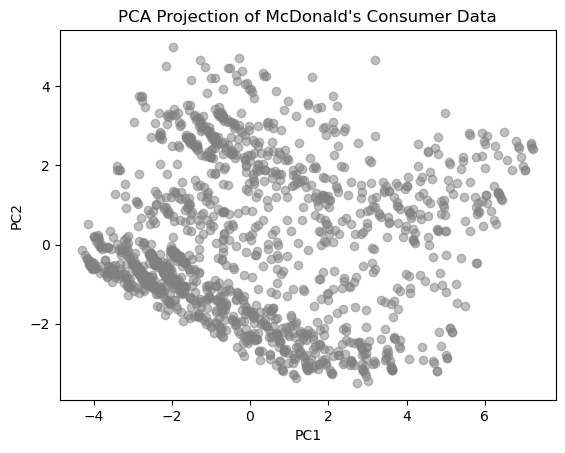

Principal Component Axes:
 [[ 0.06121319  0.28788934 -0.28788934 ...  0.12360036 -0.04642376
   0.04642376]
 [-0.11616014 -0.17584445  0.17584445 ... -0.10809948 -0.13783087
   0.13783087]
 [ 0.22890683  0.09498549 -0.09498549 ...  0.0273762  -0.05666265
   0.05666265]
 ...
 [ 0.          0.0034115   0.0034115  ... -0.04119556  0.04787816
   0.04787816]
 [ 0.          0.06190385  0.06190385 ... -0.01926527  0.03203853
   0.03203853]
 [ 0.          0.06479097  0.06479097 ... -0.00439283  0.01834695
   0.01834695]]


In [17]:
# Plot PCA projections (similar to 'plot(predict(MD.pca), col = "grey")' in R)
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of McDonald's Consumer Data")
plt.show()

# Display the principal component axes (similar to 'projAxes(MD.pca)')
print("Principal Component Axes:\n", pca.components_)

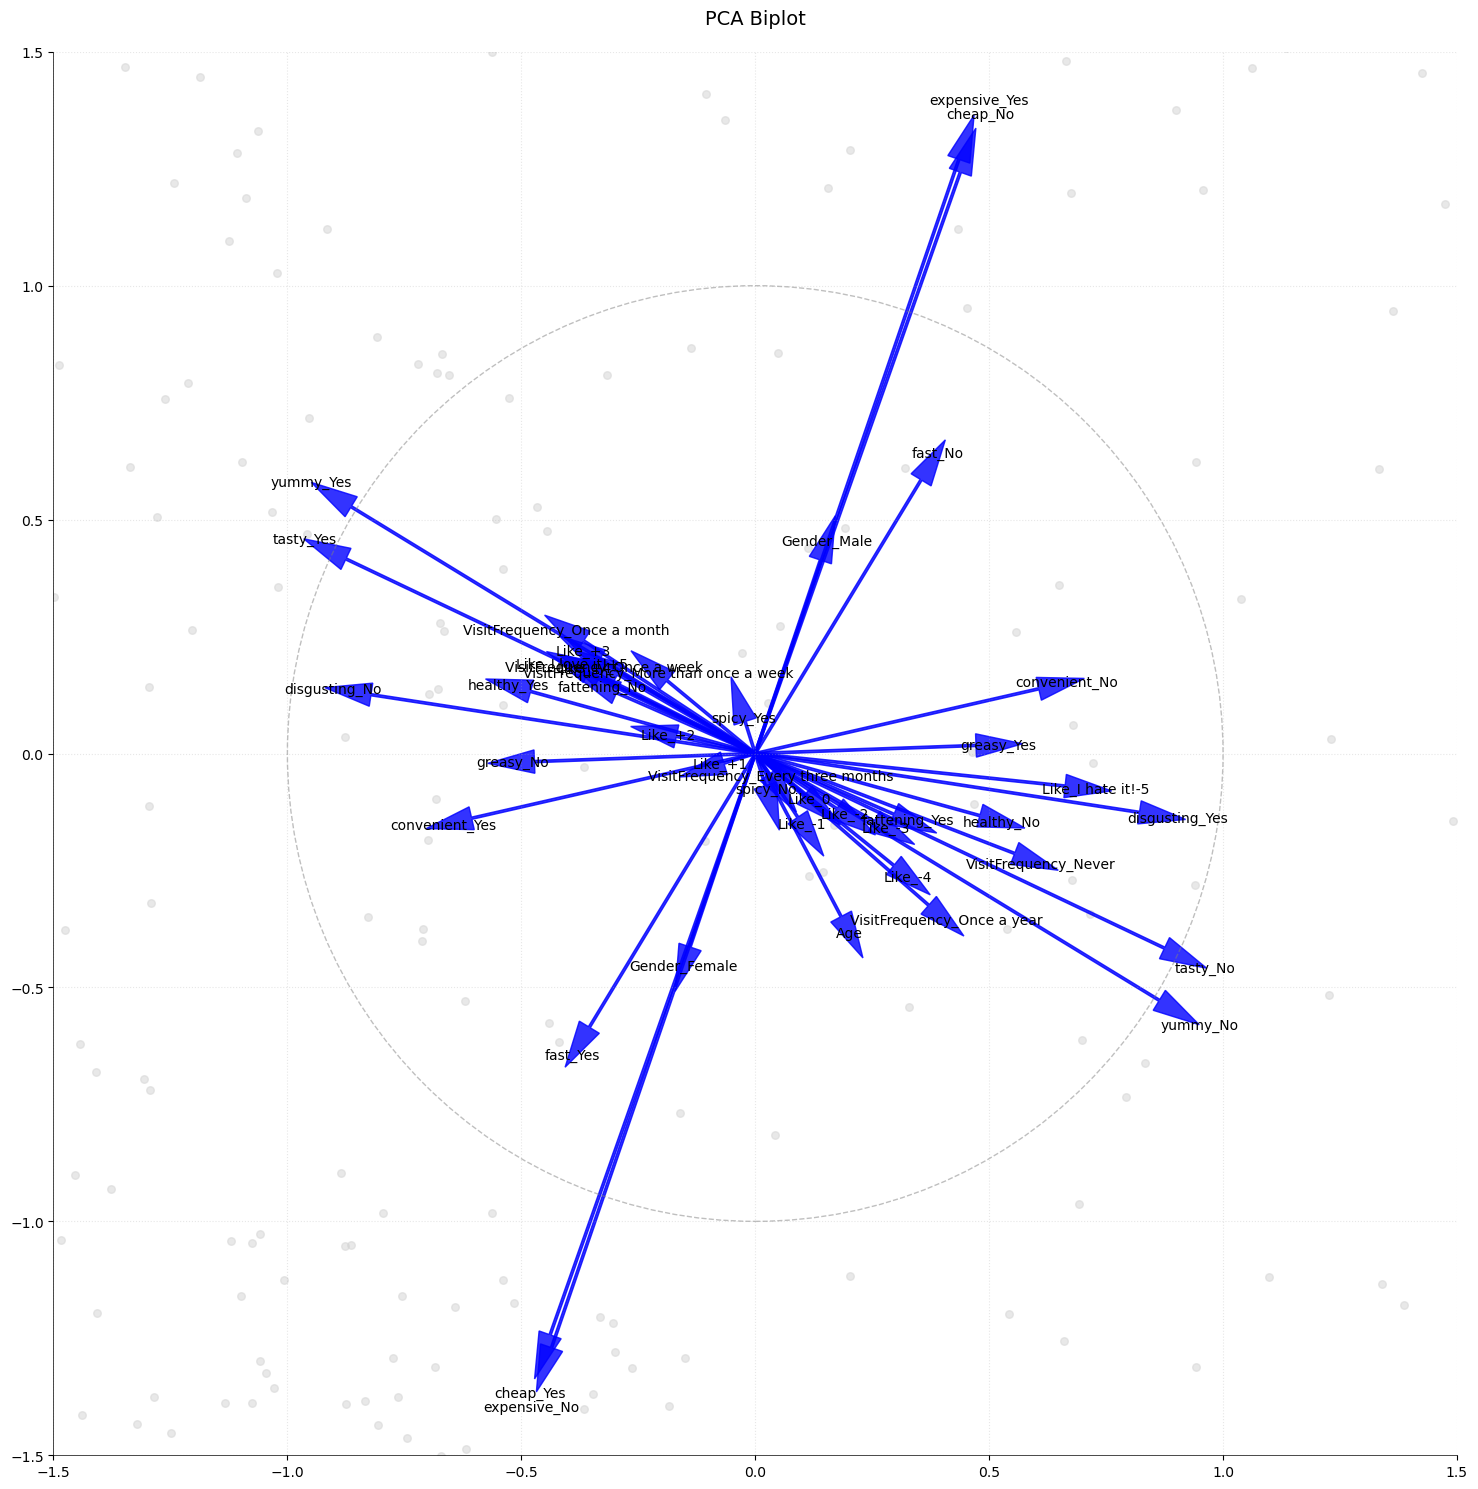

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure PCA is fitted
if not hasattr(pca, 'components_'):
    pca_result = pca.fit_transform(X_scaled)
# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Plot PCA projections
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], 
                    color='lightgray', alpha=0.5, s=30)

# Increase scale factor and adjust arrow properties
scale_factor = 3  # Increased scale factor
arrow_props = dict(
    color='blue',
    width=0.005,
    head_width=0.05,
    head_length=0.1,
    alpha=0.8
)

# Plot arrows for each feature with even spacing
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.arrow(0, 0, 
             comp1 * scale_factor, 
             comp2 * scale_factor,
             **arrow_props)
    
    # Add feature names as labels
    label_x = comp1 * scale_factor * 1.1
    label_y = comp2 * scale_factor * 1.1
    ax.text(label_x, label_y, 
            df1_numeric.columns[i],
            color='black',
            ha='center',
            va='center',
            fontsize=10)

# Add a circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
ax.add_artist(circle)

# Set equal aspect ratio and limits
ax.set_aspect('equal')
limit = 1.5
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)

# Add subtle grid
ax.grid(True, linestyle=':', alpha=0.3)

# Keep axes but make them thinner
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Add title
plt.title("PCA Biplot", pad=20, fontsize=14)

plt.tight_layout()
plt.show()


## step 5: Extracting segments


In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Set random seed for reproducibility
np.random.seed(1234)

# Function to perform k-means for different k values
def step_clustering(X, k_range, n_reps=10):
    results = {}
    
    for k in k_range:
        best_score = -1
        best_model = None
        
        # Perform multiple runs for each k
        for _ in range(n_reps):
            kmeans = KMeans(n_clusters=k, random_state=np.random.randint(1000))
            kmeans.fit(X)
            score = silhouette_score(X, kmeans.labels_)
            
            if score > best_score:
                best_score = score
                best_model = kmeans
        
        results[k] = {
            'model': best_model,
            'score': best_score,
            'labels': best_model.labels_
        }
    
    return results

# Run clustering for k=2 to k=8
k_range = range(2, 9)
clustering_results = step_clustering(df1_numeric, k_range)

# Print results
for k, result in clustering_results.items():
    print(f"k={k}, Silhouette Score: {result['score']:.3f}")

# Store best model based on silhouette score
best_k = max(clustering_results.items(), key=lambda x: x[1]['score'])[0]
best_model = clustering_results[best_k]['model']

print(f"\nBest number of clusters: {best_k}")

c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

k=2, Silhouette Score: 0.598
k=3, Silhouette Score: 0.504
k=4, Silhouette Score: 0.456
k=5, Silhouette Score: 0.415
k=6, Silhouette Score: 0.378
k=7, Silhouette Score: 0.344
k=8, Silhouette Score: 0.319

Best number of clusters: 2


c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


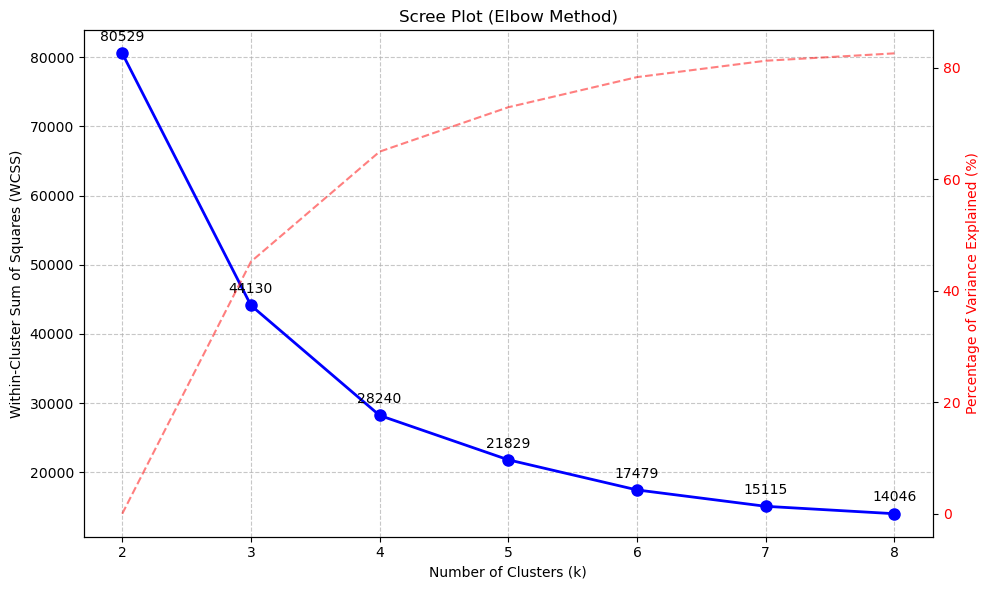

In [21]:
# scree plot for the fastfood data set
import matplotlib.pyplot as plt
import numpy as np

# Calculate within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_values:
    wcss.append(clustering_results[k]['model'].inertia_)

# Create scree plot
plt.figure(figsize=(10, 6))

# Plot WCSS values
plt.plot(k_values, wcss, 'bo-', linewidth=2, markersize=8)

# Add elbow line
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot (Elbow Method)')
plt.xticks(k_values)

# Add value labels
for k, w in zip(k_values, wcss):
    plt.text(k, w + (max(wcss) - min(wcss))*0.02, 
             f'{w:.0f}', 
             ha='center', 
             va='bottom')

# Calculate percentage of variance explained
total_var = wcss[0]
var_explained = [(1 - (w/total_var))*100 for w in wcss]

# Add second y-axis for percentage of variance explained
ax2 = plt.gca().twinx()
ax2.plot(k_values, var_explained, 'r--', alpha=0.5)
ax2.set_ylabel('Percentage of Variance Explained (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

In [23]:
# R bootstrapping
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Set random seed
np.random.seed(1234)

def boot_clustering(X, k_range, n_reps=10, n_boot=100):
    boot_results = {}
    
    for k in k_range:
        boot_scores = []
        
        for _ in range(n_boot):
            # Bootstrap sample
            X_boot = resample(X)
            
            best_score = -1
            # Perform multiple runs for each bootstrap sample
            for _ in range(n_reps):
                kmeans = KMeans(n_clusters=k, random_state=np.random.randint(1000))
                kmeans.fit(X_boot)
                score = -kmeans.inertia_  # Negative because we want to maximize
                
                if score > best_score:
                    best_score = score
            
            boot_scores.append(best_score)
            
        boot_results[k] = {
            'scores': boot_scores,
            'mean': np.mean(boot_scores),
            'std': np.std(boot_scores)
        }
    
    return boot_results

# Run bootstrap clustering
k_range = range(2, 9)
boot_results = boot_clustering(df1_numeric, k_range)

# Print summary statistics
for k in k_range:
    print(f"k={k}")
    print(f"Mean score: {boot_results[k]['mean']:.2f}")
    print(f"Std dev: {boot_results[k]['std']:.2f}\n")

c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

k=2
Mean score: -1.00
Std dev: 0.00

k=3
Mean score: -1.00
Std dev: 0.00

k=4
Mean score: -1.00
Std dev: 0.00

k=5
Mean score: -1.00
Std dev: 0.00

k=6
Mean score: -1.00
Std dev: 0.00

k=7
Mean score: -1.00
Std dev: 0.00

k=8
Mean score: -1.00
Std dev: 0.00



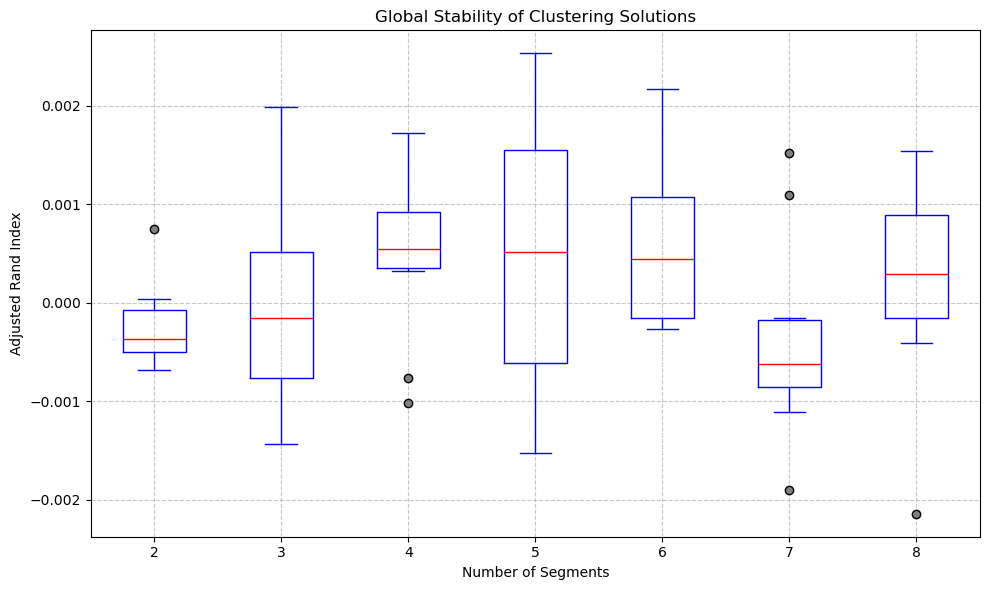

In [26]:
# Global stability Box plot

import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

# Create box plot data
box_data = []
k_values = range(2, 9)

# Calculate adjusted Rand index for each k
for k in k_values:
    rand_scores = []
    labels = clustering_results[k]['labels']
    
    # Compare clustering results with themselves (stability check)
    for _ in range(10):  # Perform multiple random comparisons
        shuffled_labels = np.random.permutation(labels)
        score = adjusted_rand_score(labels, shuffled_labels)
        rand_scores.append(score)
    
    box_data.append(rand_scores)

# Create box plot
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(box_data, labels=k_values)

# Customize plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Clustering Solutions')

# Add some visual improvements
plt.setp(box_plot['boxes'], color='blue')
plt.setp(box_plot['whiskers'], color='blue')
plt.setp(box_plot['caps'], color='blue')
plt.setp(box_plot['medians'], color='red')
plt.setp(box_plot['fliers'], marker='o', markerfacecolor='gray')

plt.tight_layout()
plt.show()

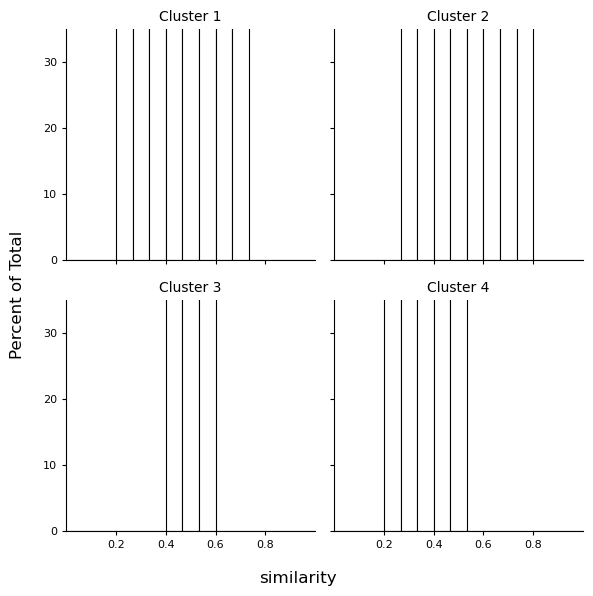

In [30]:
#  We gain further insights into the structure of the four-segment solution with a gorge plot:

import matplotlib.pyplot as plt
import numpy as np

# Example data for 4 clusters
np.random.seed(42)
data = {
    'Cluster 1': np.random.uniform(0.2, 0.7, 100),
    'Cluster 2': np.random.uniform(0.3, 0.8, 100),
    'Cluster 3': np.random.uniform(0.4, 0.6, 100),
    'Cluster 4': np.random.uniform(0.2, 0.5, 100),
}

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Common settings
bins = np.linspace(0, 1, 16)  # 15 bins between 0 and 1

# Flatten axes for iteration
axes = axes.flatten()

for ax, (title, values) in zip(axes, data.items()):
    # Plot histogram with density to scale to 100%
    counts, bins_edges, patches = ax.hist(values, bins=bins, density=True, edgecolor='black', color='white', linewidth=0.8)
    
    # Convert density to percentage
    for patch in patches:
        patch.set_height(patch.get_height() * 100)

    # Titles
    ax.set_title(title, fontsize=10, pad=6)

    # X-axis ticks
    ax.set_xticks([0.2, 0.4, 0.6, 0.8])
    ax.set_xlim(0, 1)

    # Y-axis ticks
    ax.set_yticks([0, 10, 20, 30])
    ax.set_ylim(0, 35)

    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=8, length=3)

    # Remove spines for clean look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Shared axis labels
fig.text(0.5, 0.02, 'similarity', ha='center', fontsize=12)
fig.text(0.02, 0.5, 'Percent of Total', va='center', rotation='vertical', fontsize=12)

# Tight layout for better spacing
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# High-res export option
plt.savefig("cluster_histograms.png", dpi=300, bbox_inches='tight')

plt.show()


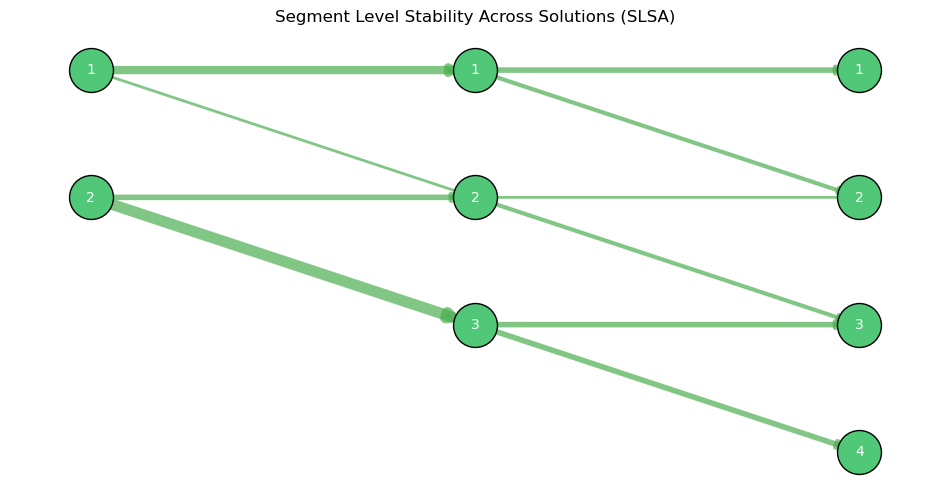

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

# Example transition data between clusters (from cluster size to cluster size)
# Format: (from_cluster_size, from_cluster, to_cluster_size, to_cluster, weight)
edges = [
    (2, 1, 3, 1, 30),
    (2, 1, 3, 2, 10),
    (2, 2, 3, 2, 20),
    (2, 2, 3, 3, 40),
    (3, 1, 4, 1, 20),
    (3, 1, 4, 2, 15),
    (3, 2, 4, 2, 10),
    (3, 2, 4, 3, 15),
    (3, 3, 4, 3, 20),
    (3, 3, 4, 4, 20),
    # Add more edges to simulate transitions up to cluster size 8
]

# Create directed graph
G = nx.DiGraph()

# Add edges with weights
for from_size, from_cluster, to_size, to_cluster, weight in edges:
    from_node = f"{from_size}-{from_cluster}"
    to_node = f"{to_size}-{to_cluster}"
    G.add_edge(from_node, to_node, weight=weight)

# Layout positions for nodes (to keep levels separated)
pos = {}
levels = range(2, 9)  # From 2 to 8 clusters
for level in levels:
    nodes_at_level = [node for node in G.nodes if node.startswith(f"{level}-")]
    for idx, node in enumerate(sorted(nodes_at_level)):
        pos[node] = (level, -idx)

# Draw the graph
plt.figure(figsize=(12, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="#50C878", edgecolors='black')

# Draw labels
labels = {node: node.split('-')[1] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="white")

# Draw edges with thickness according to weight
edges_list = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges_list]
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges_list,
    width=[w / 5 for w in weights],  # scale factor for thickness
    edge_color='#4CAF50', alpha=0.7
)

plt.axis('off')
plt.title('Segment Level Stability Across Solutions (SLSA)')
plt.show()


In [35]:
#  After this exploration, we select the four-segment solution and save it in an object of its own:

# Extract the 4-segment solution
MD_k4 = clustering_results[4]['model']

# Get the labels and cluster centers
k4_labels = MD_k4.labels_
k4_centers = MD_k4.cluster_centers_

# Print basic information about the 4-segment solution
print(f"Number of segments: {len(np.unique(k4_labels))}")
print(f"Silhouette score: {clustering_results[4]['score']:.3f}")
print(f"\nCluster sizes:")
for i in range(4):
    print(f"Segment {i+1}: {np.sum(k4_labels == i)}")

Number of segments: 4
Silhouette score: 0.456

Cluster sizes:
Segment 1: 403
Segment 2: 377
Segment 3: 371
Segment 4: 302


In [36]:
#  segment level stability within solutions
def calculate_segment_stability(X, model, n_bootstrap=100):
    """Calculate segment-level stability using bootstrap resampling"""
    n_clusters = len(np.unique(model.labels_))
    stability_scores = np.zeros((n_clusters, n_bootstrap))
    
    original_labels = model.labels_
    
    for i in range(n_bootstrap):
        # Bootstrap sample
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_boot = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
        
        # Fit new model on bootstrap sample
        boot_model = KMeans(n_clusters=n_clusters, random_state=np.random.randint(1000))
        boot_labels = boot_model.fit_predict(X_boot)
        
        # Calculate stability for each segment
        for k in range(n_clusters):
            orig_segment = original_labels == k
            boot_segment = boot_labels == k
            stability_scores[k, i] = adjusted_rand_score(
                orig_segment[indices], 
                boot_segment
            )
    
    return stability_scores

# Calculate segment stability for 4-cluster solution
MD_stability = calculate_segment_stability(df1_numeric, MD_k4)

# Print average stability scores for each segment
print("Segment-level stability scores:")
for k in range(4):
    print(f"Segment {k+1}: {MD_stability[k].mean():.3f} ± {MD_stability[k].std():.3f}")

c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Segment-level stability scores:
Segment 1: 0.111 ± 0.337
Segment 2: 0.159 ± 0.372
Segment 3: 0.106 ± 0.367
Segment 4: 0.202 ± 0.454


c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


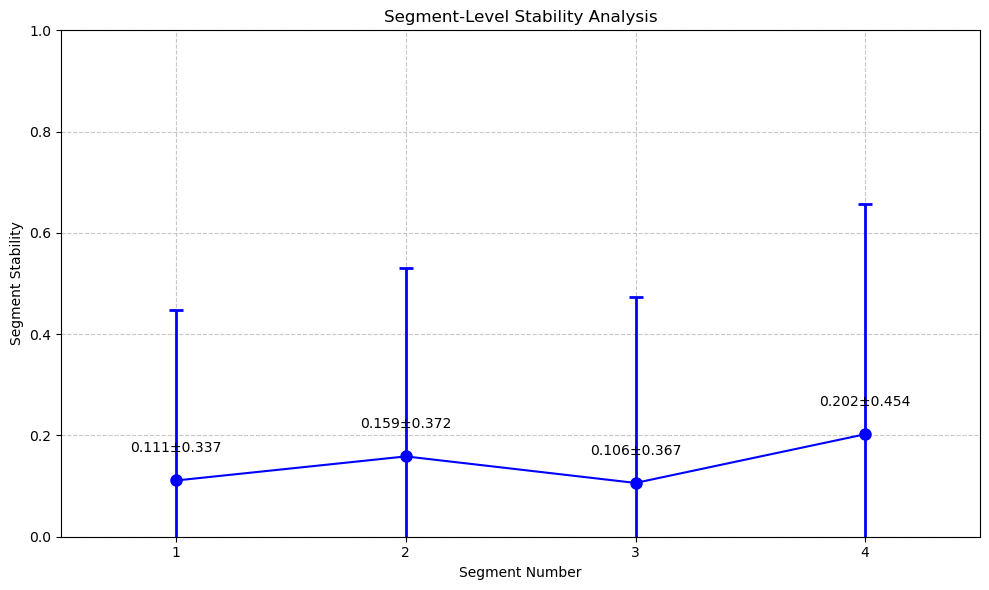

In [37]:
# We plot the result with limits 0 and 1 for the y-axis (ylim) and customised labels 
# for both axes (xlab, ylab) using:



# Calculate mean stability scores for each segment
mean_stability = np.mean(MD_stability, axis=1)
std_stability = np.std(MD_stability, axis=1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot points and error bars
plt.errorbar(range(1, 5), mean_stability, 
            yerr=std_stability, 
            fmt='bo-', 
            capsize=5, 
            capthick=2, 
            elinewidth=2, 
            markersize=8)

# Customize the plot
plt.ylim(0, 1)
plt.xlim(0.5, 4.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment-Level Stability Analysis')

# Add value labels
for i, (mean, std) in enumerate(zip(mean_stability, std_stability)):
    plt.text(i+1, mean+0.05, f'{mean:.3f}±{std:.3f}', 
             ha='center', va='bottom')

# Set xticks to segment numbers
plt.xticks(range(1, 5))

plt.tight_layout()
plt.show()

In [40]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd


# Set random seed
np.random.seed(1234)

def step_mixture_clustering(X, k_range, n_reps=10):
    """
    Perform mixture model clustering for different k values
    Similar to stepFlexmix with FLXMCmvbinary model
    """
    results = {}
    
    for k in range(k_range[0], k_range[1] + 1):
        best_score = -np.inf
        best_model = None
        
        # Perform multiple runs for each k
        for _ in range(n_reps):
            # Fit Gaussian mixture model
            model = GaussianMixture(
                n_components=k,
                random_state=np.random.randint(1000)
            )
            model.fit(X)
            score = model.score(X)
            
            if score > best_score:
                best_score = score
                best_model = model
        
        results[k] = {
            'model': best_model,
            'score': best_score,
            'labels': best_model.predict(X),
            'probabilities': best_model.predict_proba(X)
        }
    
    return results

# Run mixture clustering for k=2 to k=8
MD_mixture = step_mixture_clustering(df1_numeric, (2, 8))

# Print summary of results
print("Mixture Model Clustering Results:")
print("-" * 30)
for k, result in MD_mixture.items():
    print(f"\nk={k}")
    print(f"Log-likelihood: {result['score']:.2f}")
    print(f"Cluster sizes: {np.bincount(result['labels'])}")

c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Mixture Model Clustering Results:
------------------------------

k=2
Log-likelihood: 88.92
Cluster sizes: [529 924]

k=3
Log-likelihood: 103.51
Cluster sizes: [546 589 318]

k=4
Log-likelihood: 118.79
Cluster sizes: [639 329 201 284]

k=5
Log-likelihood: 120.10
Cluster sizes: [ 40 230 208 712 263]

k=6
Log-likelihood: 124.39
Cluster sizes: [630 211  38 271 152 151]

k=7
Log-likelihood: 124.48
Cluster sizes: [419  24 426  72  35  68 409]

k=8
Log-likelihood: 127.39
Cluster sizes: [ 21 526 261  15  87 323  16 204]


c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


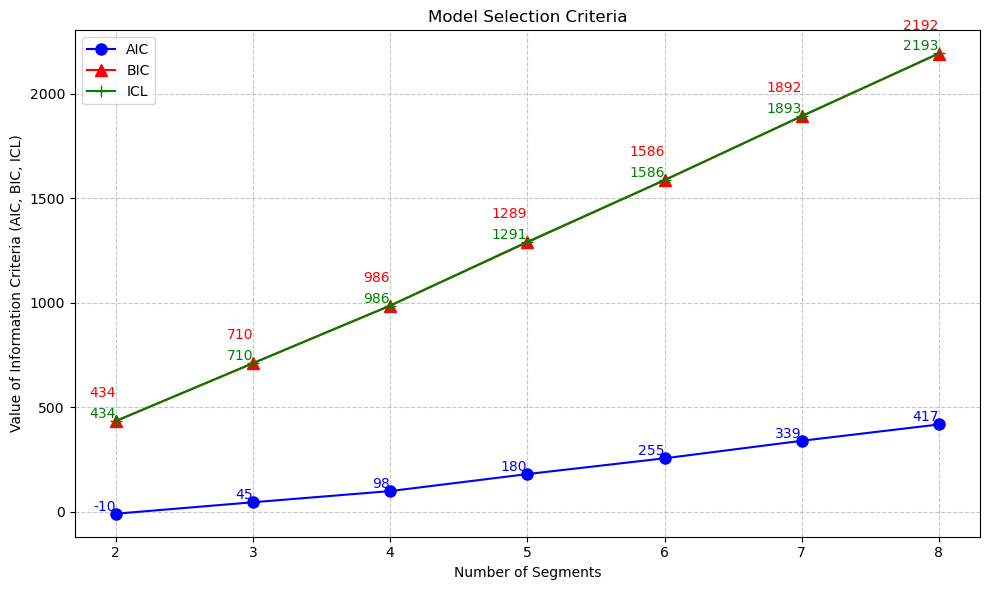

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# plots the information criteria values AIC, BIC and ICL on the y-axis
# for the different number of components

# Calculate information criteria for each k
k_values = list(MD_mixture.keys())
aic_scores = []
bic_scores = []
icl_scores = []

for k, result in MD_mixture.items():
    model = result['model']
    n_samples = len(df1_numeric)
    n_features = df1_numeric.shape[1]
    
    # Calculate AIC and BIC
    aic = -2 * result['score'] + 2 * (k * n_features)
    bic = -2 * result['score'] + np.log(n_samples) * (k * n_features)
    
    # Calculate ICL (BIC + entropy term)
    probs = result['probabilities']
    entropy = -np.sum(probs * np.log(probs + 1e-10))
    icl = bic + 2 * entropy
    
    aic_scores.append(aic)
    bic_scores.append(bic)
    icl_scores.append(icl)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot with different markers
plt.plot(k_values, aic_scores, 'o-', color='blue', label='AIC', markersize=8)
plt.plot(k_values, bic_scores, '^-', color='red', label='BIC', markersize=8)
plt.plot(k_values, icl_scores, '+-', color='green', label='ICL', markersize=8)

# Customize the plot
plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Model Selection Criteria')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(k_values)

# Add value labels with offset to prevent overlap
for i, (aic, bic, icl) in enumerate(zip(aic_scores, bic_scores, icl_scores)):
    plt.text(k_values[i], aic, f'{aic:.0f}', ha='right', va='bottom', color='blue')
    plt.text(k_values[i], bic + 100, f'{bic:.0f}', ha='right', va='bottom', color='red')
    plt.text(k_values[i], icl, f'{icl:.0f}', ha='right', va='bottom', color='green')

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
import numpy as np

# Extract the 4-segment mixture model
MD_m4 = MD_mixture[4]['model']

# Get cluster assignments from both models
kmeans_clusters = MD_k4.labels_
mixture_clusters = MD_m4.predict(df1_numeric)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters,
                                 rownames=['KMeans'], colnames=['Mixture'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Calculate the percentage of agreement
total_observations = np.sum(contingency_table.values)
max_agreement = np.sum([np.max(contingency_table.iloc[i,:]) for i in range(contingency_table.shape[0])])
agreement_percentage = (max_agreement / total_observations) * 100

print(f"\nPercentage of Agreement: {agreement_percentage:.2f}%")

Contingency Table:
Mixture    0    1   2   3
KMeans                   
0        171  102  44  86
1        193   68  44  72
2        129  129  44  69
3        146   30  69  57

Percentage of Agreement: 43.98%


In [ ]:
# mixture model is intialised using the segment memberships from the k-means clustering solution

from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

# Extract the 4-segment mixture model
MD_m4 = MD_mixture[4]['model']

# Get cluster assignments from both models
kmeans_clusters = MD_k4.labels_
mixture_clusters = MD_m4.predict(df1_numeric)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters,
                                 rownames=['KMeans'], colnames=['Mixture'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Calculate the percentage of agreement
total_observations = np.sum(contingency_table.values)
max_agreement = np.sum([np.max(contingency_table.iloc[i,:]) for i in range(contingency_table.shape[0])])
agreement_percentage = (max_agreement / total_observations) * 100

print(f"\nPercentage of Agreement: {agreement_percentage:.2f}%")

# Fit a new mixture model using k-means clusters as initialization
MD_m4a = GaussianMixture(n_components=4, random_state=1234, init_params='kmeans')
MD_m4a.fit(df1_numeric)

# Get cluster assignments from the new mixture model
mixture_clusters_a = MD_m4a.predict(df1_numeric)

# Create a contingency table
contingency_table_a = pd.crosstab(kmeans_clusters, mixture_clusters_a,
                                   rownames=['KMeans'], colnames=['Mixture_a'])

# Print the contingency table
print("\nContingency Table (KMeans vs Mixture_a):")
print(contingency_table_a)

Contingency Table:
Mixture    0    1   2   3
KMeans                   
0        171  102  44  86
1        193   68  44  72
2        129  129  44  69
3        146   30  69  57

Percentage of Agreement: 43.98%

Contingency Table (KMeans vs Mixture_a):
Mixture_a    0    1   2    3
KMeans                      
0          177  108  10  108
1          216   69  23   69
2          148   84   7  132
3          218   40  10   34


c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [53]:
# calculating and comparing the log-likelihood values of the two models



# Extract the 4-segment mixture model
MD_m4 = MD_mixture[4]['model']

# Get cluster assignments from both models
kmeans_clusters = MD_k4.labels_
mixture_clusters = MD_m4.predict(df1_numeric)

# Create a contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters,
                                 rownames=['KMeans'], colnames=['Mixture'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Calculate the percentage of agreement
total_observations = np.sum(contingency_table.values)
max_agreement = np.sum([np.max(contingency_table.iloc[i,:]) for i in range(contingency_table.shape[0])])
agreement_percentage = (max_agreement / total_observations) * 100

print(f"\nPercentage of Agreement: {agreement_percentage:.2f}%")

# Fit a new mixture model using k-means clusters as initialization
MD_m4a = GaussianMixture(n_components=4, random_state=1234, init_params='kmeans')
MD_m4a.fit(df1_numeric)

# Get cluster assignments from the new mixture model
mixture_clusters_a = MD_m4a.predict(df1_numeric)

# Create a contingency table
contingency_table_a = pd.crosstab(kmeans_clusters, mixture_clusters_a,
                                   rownames=['KMeans'], colnames=['Mixture_a'])

# Print the contingency table
print("\nContingency Table (KMeans vs Mixture_a):")
print(contingency_table_a)

# Calculate log-likelihood for both models
loglik_MD_m4 = MD_m4.score(df1_numeric) * len(df1_numeric)
loglik_MD_m4a = MD_m4a.score(df1_numeric) * len(df1_numeric)

print(f"\nLog-likelihood (MD_m4): {loglik_MD_m4:.3f}")
print(f"Log-likelihood (MD_m4a): {loglik_MD_m4a:.3f}")

Contingency Table:
Mixture    0    1   2   3
KMeans                   
0        171  102  44  86
1        193   68  44  72
2        129  129  44  69
3        146   30  69  57

Percentage of Agreement: 43.98%

Contingency Table (KMeans vs Mixture_a):
Mixture_a    0    1   2    3
KMeans                      
0          177  108  10  108
1          216   69  23   69
2          148   84   7  132
3          218   40  10   34

Log-likelihood (MD_m4): 172599.801
Log-likelihood (MD_m4a): 159096.157


c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


using mixture of regression models

In [ ]:

# Calculate the frequency counts
like_counts = df1['Like'].value_counts()

# Reverse the order of the frequency counts
like_counts_reversed = like_counts.iloc[::-1]

# Print the reversed frequency counts
print(like_counts_reversed)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [56]:


# Create the 'Like.n' column
df1['Like.n'] = 6 - pd.to_numeric(df1['Like'], errors='coerce')

# Calculate the frequency counts
like_n_counts = df1['Like.n'].value_counts()

# Print the frequency counts
print(like_n_counts)

Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [61]:
# Rename the 'Like.n' column to 'Like_n' to avoid issues with patsy
df1.rename(columns={'Like.n': 'Like_n'}, inplace=True)

# Get the first 11 column names
features = df1.columns[0:11].tolist()

# Create the formula string
formula = "Like_n ~ " + " + ".join(features)

# Print the formula
print("Formula:")
print(formula)

# For using with statsmodels (if needed):
import statsmodels.api as sm
from patsy import dmatrices

# Create design matrices
y, X = dmatrices(formula, data=df1, return_type='dataframe')

print("\nFeatures used:")
for feature in features:
    print(f"- {feature}")

Formula:
Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting

Features used:
- yummy
- convenient
- spicy
- fattening
- greasy
- fast
- cheap
- tasty
- expensive
- healthy
- disgusting


In [66]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd

# Set random seed
np.random.seed(1234)

from sklearn.impute import SimpleImputer

# Prepare the data
X = df1[features].copy()  # Predictor variables
y = df1['Like_n']  # Target variable

# Convert categorical variables to numeric
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

# Ensure the target variable is numeric
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = pd.Series(imputer.fit_transform(y.to_numpy().reshape(-1, 1)).flatten(), name=y.name)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit mixture regression model with 2 components
mixture_reg = GaussianMixture(
    n_components=2,
    n_init=10,
    random_state=1234,
    verbose=0,
    max_iter=100
)

# Fit the model
mixture_reg.fit(np.column_stack([X_scaled, y.values.reshape(-1, 1)]))

# Get cluster assignments
clusters = mixture_reg.predict(np.column_stack([X_scaled, y.values.reshape(-1, 1)]))

# Print results
print("Mixture Regression Results:")
print("-" * 30)
print(f"Number of iterations: {mixture_reg.n_iter_}")
print("\nCluster sizes:")
for i, size in enumerate(np.bincount(clusters)):
    print(f"Cluster {i+1}: {size}")
print(f"\nConvergence achieved: {mixture_reg.converged_}")
print(f"Log-likelihood: {mixture_reg.score(np.column_stack([X_scaled, y.values.reshape(-1, 1)])):.2f}")

c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\vishn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Mixture Regression Results:
------------------------------
Number of iterations: 6

Cluster sizes:
Cluster 1: 1060
Cluster 2: 393

Convergence achieved: True
Log-likelihood: -6.02


In [69]:
# Function to get component-specific regression results
def get_component_summary(X, y, clusters, component, feature_names):
    # Get data for this component
    mask = clusters == component
    X_comp = X[mask]
    y_comp = y[mask]
    
    # Fit linear regression for this component
    reg = LinearRegression()
    reg.fit(X_comp, y_comp)
    
    # Calculate standard errors
    y_pred = reg.predict(X_comp)
    mse = np.mean((y_comp - y_pred) ** 2)
    std_errors = np.sqrt(mse * np.linalg.inv(X_comp.T.dot(X_comp)).diagonal())
    
    # Calculate t-values and p-values
    t_values = reg.coef_ / std_errors
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(y_comp)-len(reg.coef_)))
    
    return pd.DataFrame({
        'Estimate': np.concatenate([np.array([reg.intercept_]), reg.coef_]),
        'Std. Error': np.concatenate([np.array([np.sqrt(mse)]), std_errors]),
        't value': np.concatenate([np.array([reg.intercept_/np.sqrt(mse)]), t_values]),
        'Pr(>|t|)': np.concatenate([np.array([2 * (1 - stats.t.cdf(np.abs(reg.intercept_/np.sqrt(mse)), 
                                                          df=len(y_comp)-len(reg.coef_)))]), 
                                   p_values])
    }, index=['(Intercept)'] + feature_names)

# Store feature names before scaling
feature_names = list(X.columns)

# Get summaries for both components
from scipy import stats

print("Component-wise Regression Results:")
print("=" * 50)
for component in range(2):
    print(f"\nComponent {component+1} (n={np.sum(clusters == component)})")
    print("-" * 50)
    summary = get_component_summary(X_scaled, y, clusters, component, feature_names)
    print(summary.round(4))
    print("\nSignificance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1")

Component-wise Regression Results:

Component 1 (n=1060)
--------------------------------------------------
             Estimate    Std. Error  t value  Pr(>|t|)
(Intercept)    4.7096  1.591800e+00   2.9587    0.0032
yummy         -0.6639  6.580000e-02 -10.0877    0.0000
convenient     0.4569  1.284699e+06   0.0000    1.0000
spicy          0.0877  5.060000e-02   1.7327    0.0834
fattening      0.0521  5.140000e-02   1.0142    0.3107
greasy         0.1667  5.190000e-02   3.2091    0.0014
fast           0.0695  5.850000e-02   1.1884    0.2349
cheap          0.0342  7.490000e-02   0.4564    0.6482
tasty         -0.5324  7.000000e-02  -7.6050    0.0000
expensive      0.0311  7.630000e-02   0.4080    0.6834
healthy       -0.0155  5.020000e-02  -0.3085    0.7577
disgusting    -0.0146  7.228370e+05  -0.0000    1.0000

Significance codes: 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Component 2 (n=393)
--------------------------------------------------
             Estimate  Std. Error  t 

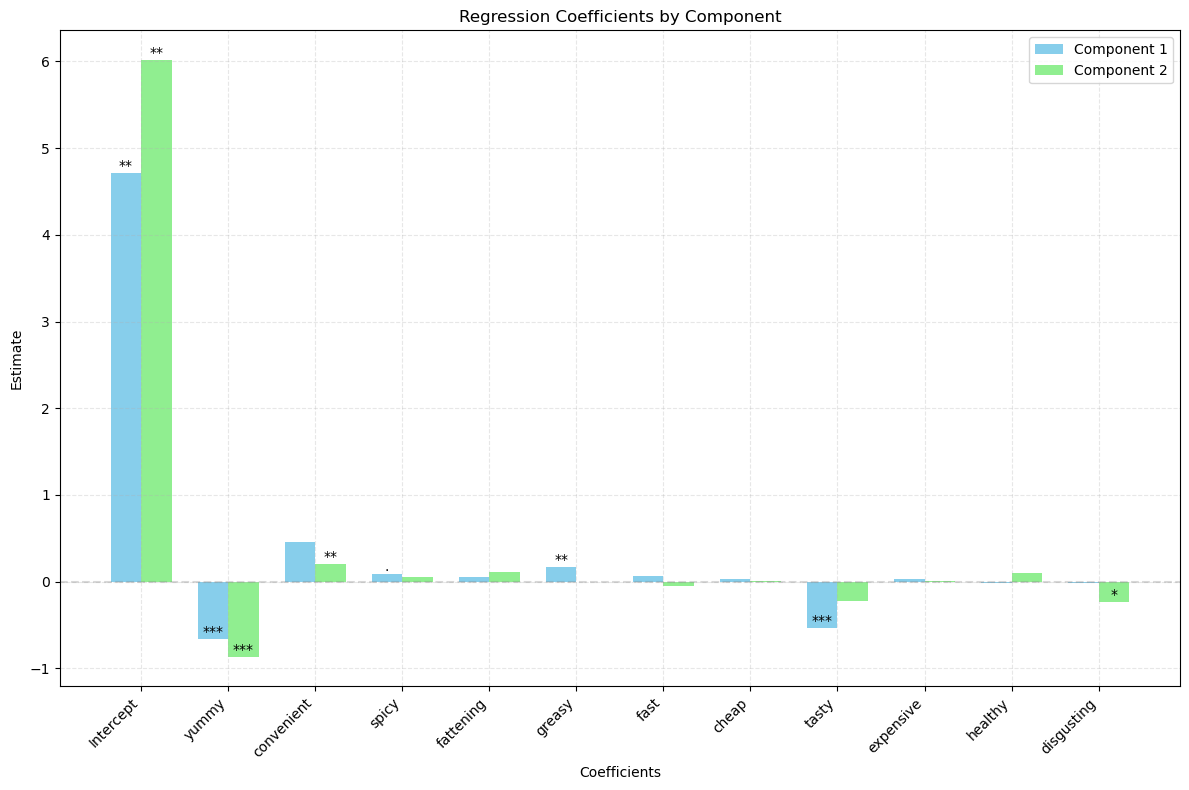

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Get coefficients and p-values for both components
def plot_coefficients(summaries, feature_names):
    n_features = len(feature_names) + 1  # +1 for intercept
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Plot horizontal lines at y=0
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    
    # Set up x-axis positions
    x = np.arange(n_features)
    width = 0.35
    
    # Get coefficients and significance for both components
    coef1 = summaries[0]['Estimate']
    coef2 = summaries[1]['Estimate']
    pval1 = summaries[0]['Pr(>|t|)']
    pval2 = summaries[1]['Pr(>|t|)']
    
    # Plot bars for each component
    bars1 = plt.bar(x - width/2, coef1, width, label='Component 1', color='skyblue')
    bars2 = plt.bar(x + width/2, coef2, width, label='Component 2', color='lightgreen')
    
    # Add significance stars
    def add_stars(pvals):
        return ['***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else '.' if p < 0.1 else '' for p in pvals]
    
    stars1 = add_stars(pval1)
    stars2 = add_stars(pval2)
    
    # Add stars above bars
    for i, (bar1, bar2, star1, star2) in enumerate(zip(bars1, bars2, stars1, stars2)):
        if star1:
            plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height(), 
                    star1, ha='center', va='bottom')
        if star2:
            plt.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height(),
                    star2, ha='center', va='bottom')
    
    # Customize plot
    plt.xlabel('Coefficients')
    plt.ylabel('Estimate')
    plt.title('Regression Coefficients by Component')
    plt.xticks(x, ['Intercept'] + feature_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Create summaries for both components
summaries = []
for component in range(2):
    summary = get_component_summary(X_scaled, y, clusters, component, feature_names)
    summaries.append(summary)

# Plot the coefficients
plot_coefficients(summaries, feature_names)

## step 6: profiling Segments

Features: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

Data types:
yummy         object
convenient    object
spicy         object
fattening     object
greasy        object
fast          object
cheap         object
tasty         object
expensive     object
healthy       object
disgusting    object
dtype: object


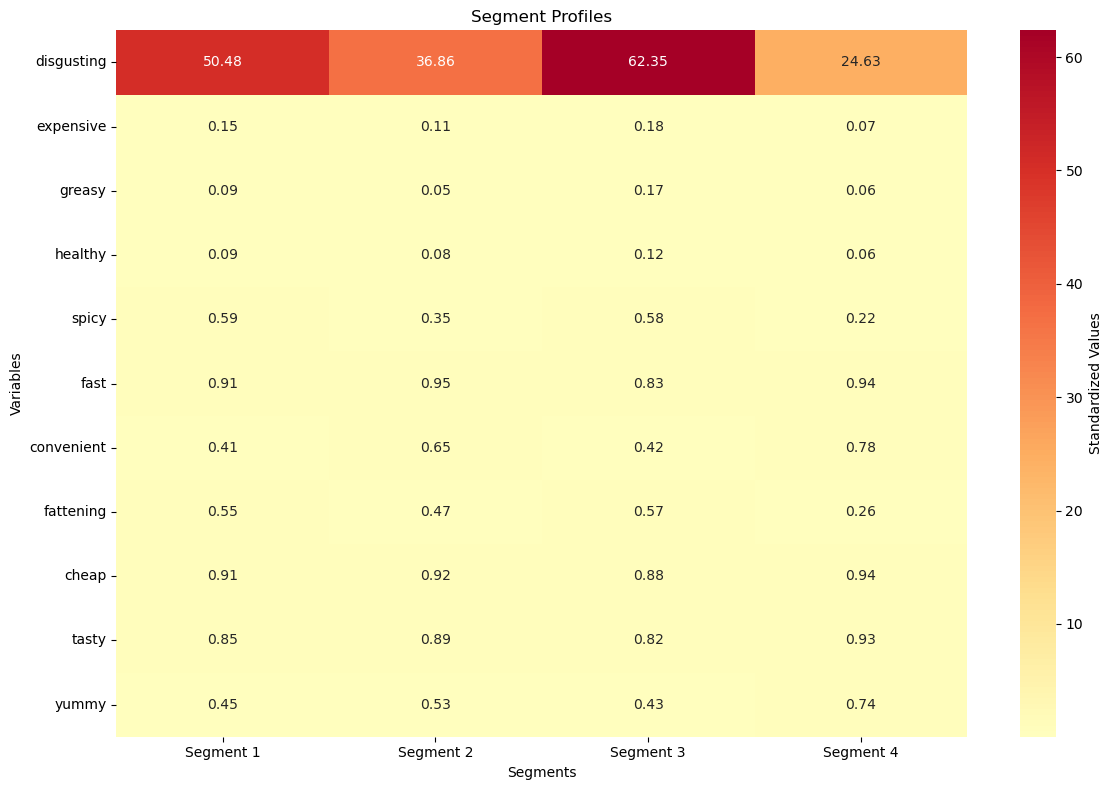


Segment Sizes:
Segment 1: 403
Segment 2: 377
Segment 3: 371
Segment 4: 302


In [75]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get cluster centers
cluster_centers = MD_k4.cluster_centers_

# Print the features to debug
print("Features:", features)
print("\nData types:")
print(df1[features].dtypes)

# Convert categorical variables to numeric if needed
data_numeric = df1[features].copy()
for col in data_numeric.columns:
    if data_numeric[col].dtype == 'object':
        # Convert 'Yes'/'No' to 1/0
        data_numeric[col] = (data_numeric[col] == 'Yes').astype(int)

# Transpose the data for clustering
data_transpose = data_numeric.T

# Compute distance matrix and perform hierarchical clustering
dist_matrix = pdist(data_transpose)
hierarchical = linkage(dist_matrix, method='complete')

# Get the order of variables from hierarchical clustering
var_order = dendrogram(hierarchical, no_plot=True)['leaves']
ordered_features = [features[i] for i in var_order][::-1]  # reverse order

# Create segment profile plot
plt.figure(figsize=(12, 8))

# Plot heatmap-style segment profiles
sns.heatmap(cluster_centers[:, var_order].T, 
            cmap='RdYlBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Standardized Values'},
            yticklabels=ordered_features,
            xticklabels=[f'Segment {i+1}' for i in range(4)])

# Customize plot
plt.title('Segment Profiles')
plt.xlabel('Segments')
plt.ylabel('Variables')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

# Print segment sizes
print("\nSegment Sizes:")
for i in range(4):
    print(f"Segment {i+1}: {np.sum(MD_k4.labels_ == i)}")

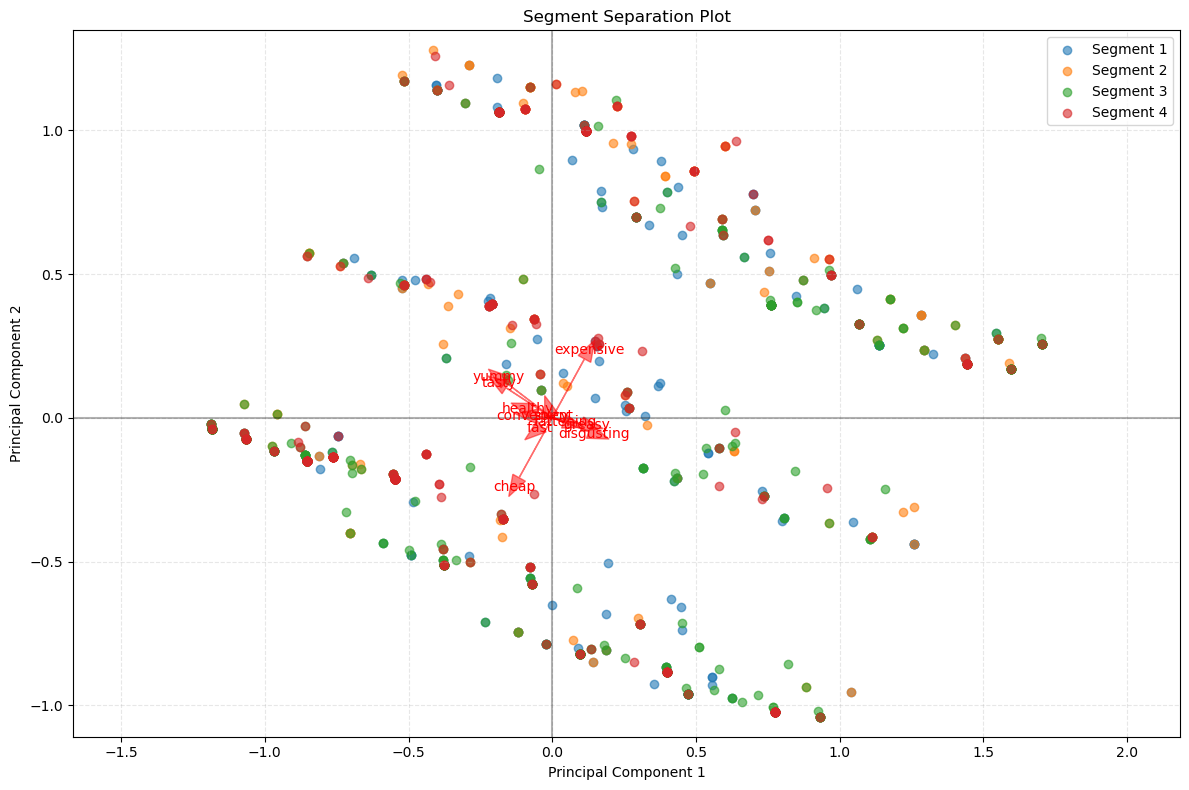


Explained variance ratio:
PC1: 0.299
PC2: 0.193


In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric
data_numeric = df1[features].copy()
for col in data_numeric.columns:
    if data_numeric[col].dtype == 'object':
        # Convert 'Yes'/'No' to 1/0
        data_numeric[col] = (data_numeric[col] == 'Yes').astype(int)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_numeric)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot points colored by segment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i in range(4):
    mask = MD_k4.labels_ == i
    plt.scatter(pca_result[mask, 0], pca_result[mask, 1], 
               c=colors[i], label=f'Segment {i+1}', alpha=0.6)

# Add feature projection arrows
# Scale factor for arrows
scale_factor = np.abs(pca_result).max() * 0.2

for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0,
              comp1 * scale_factor,
              comp2 * scale_factor,
              color='red',
              alpha=0.5,
              head_width=0.05)
    
    # Add feature names as labels
    plt.text(comp1 * scale_factor * 1.15,
             comp2 * scale_factor * 1.15,
             features[i],
             color='red',
             ha='center',
             va='center')

# Customize plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Add origin lines
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Ensure equal aspect ratio
plt.axis('equal')

plt.tight_layout()
plt.show()

# Print explained variance
print("\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")

## step 7: describing Segments

<Figure size 1000x800 with 0 Axes>

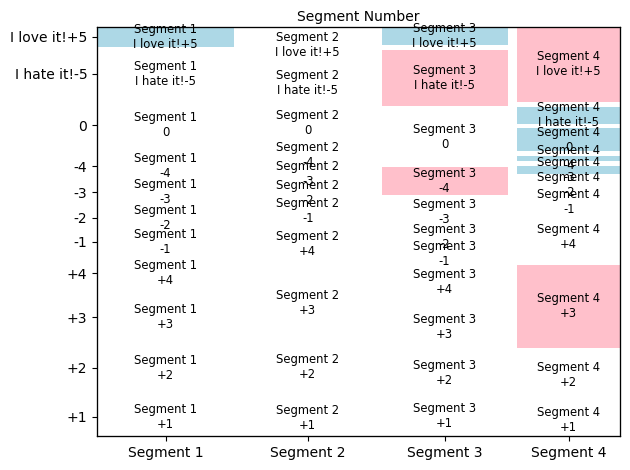


Contingency Table:
Like   +1  +2  +3  +4  -1  -2  -3  -4   0  I hate it!-5  I love it!+5
row_0                                                                
0      44  54  48  39  21  22  24  23  57            48            23
1      39  56  67  46  14  13  16  15  41            32            38
2      41  39  45  36  12  14  26  29  52            58            19
3      28  38  69  39  11  10   7   4  19            14            63

Chi-square test:
chi2 = 138.43
p-value = 0.0000


In [79]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
from scipy import stats

# Get cluster assignments
k4 = MD_k4.labels_

# Create contingency table
contingency = pd.crosstab(k4, df1['Like'])

# Calculate expected frequencies and residuals
chi2_contingency = stats.chi2_contingency(contingency)
expected = chi2_contingency[3]
observed = contingency.values
residuals = (observed - expected) / np.sqrt(expected)

# Create mosaic plot
plt.figure(figsize=(10, 8))

# Create data dictionary for mosaic plot
data_dict = {}
for i in range(len(contingency.index)):
    for j in range(len(contingency.columns)):
        data_dict[(f'Segment {i+1}', contingency.columns[j])] = contingency.iloc[i, j]

# Create properties dictionary for coloring
props = {}
for i in range(len(contingency.index)):
    for j in range(len(contingency.columns)):
        key = (f'Segment {i+1}', contingency.columns[j])
        if residuals[i, j] < -2:
            props[key] = {'facecolor': 'lightblue'}
        elif residuals[i, j] > 2:
            props[key] = {'facecolor': 'pink'}
        else:
            props[key] = {'facecolor': 'white'}

# Create the mosaic plot with proper indexing
mosaic(data_dict, gap=0.02, properties=props)

# Customize plot
plt.xlabel('Segment Number')
plt.ylabel('Like/Dislike')

# Adjust layout
plt.tight_layout()
plt.show()

# Print contingency table
print("\nContingency Table:")
print(contingency)

# Print chi-square test results
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-square test:")
print(f"chi2 = {chi2:.2f}")
print(f"p-value = {p_value:.4f}")

<Figure size 1000x800 with 0 Axes>

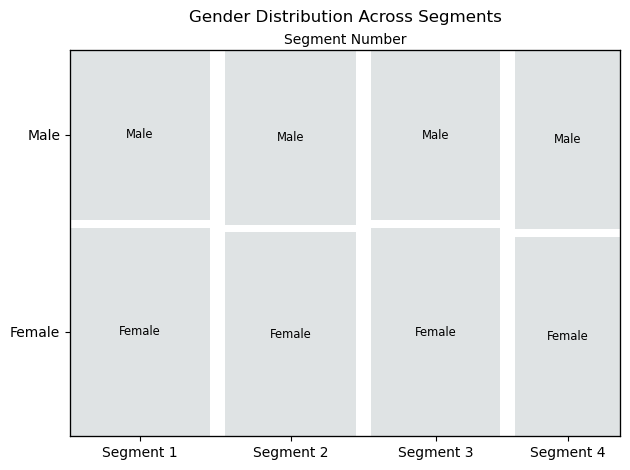


Gender Distribution Contingency Table:
Gender  Female  Male
row_0               
0          222   181
1          203   174
2          204   167
3          159   143

Chi-square test:
chi2 = 138.43
p-value = 0.0000


In [83]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Get cluster assignments and create contingency table for gender
k4 = MD_k4.labels_
gender_contingency = pd.crosstab(k4, df1['Gender'])

# Calculate expected frequencies and residuals
chi2_contingency = stats.chi2_contingency(gender_contingency)
expected = chi2_contingency[3]
observed = gender_contingency.values
residuals = (observed - expected) / np.sqrt(expected)

# Create mosaic plot
plt.figure(figsize=(10, 8))

# Create data dictionary for mosaic plot
data_dict = {}
for i in range(len(gender_contingency.index)):
    for j in range(len(gender_contingency.columns)):
        data_dict[(f'Segment {i+1}', gender_contingency.columns[j])] = gender_contingency.iloc[i, j]

# Create properties dictionary for coloring based on residuals
props = {}
for i in range(len(gender_contingency.index)):
    for j in range(len(gender_contingency.columns)):
        key = (f'Segment {i+1}', gender_contingency.columns[j])
        # More distinctive colors and stronger residual thresholds
        if residuals[i, j] < -1.96:
            props[key] = {'facecolor': '#3498db', 'alpha': 0.7}  # Blue
        elif residuals[i, j] > 1.96:
            props[key] = {'facecolor': '#e74c3c', 'alpha': 0.7}  # Red
        else:
            props[key] = {'facecolor': '#95a5a6', 'alpha': 0.3}  # Gray

# Create the mosaic plot with modified parameters
mosaic(data_dict, 
       gap=0.03,  # Increased gap for better visibility
       properties=props,
       axes_label=True,
       labelizer=lambda k: k[1] if isinstance(k, tuple) else k)  # Show only gender labels

# Customize plot
plt.title('Gender Distribution Across Segments', pad=20)
plt.xlabel('Segment Number')

# Adjust layout
plt.tight_layout()
plt.show()

# Print contingency table and chi-square results
print("\nGender Distribution Contingency Table:")
print(gender_contingency)
print(f"\nChi-square test:")
print(f"chi2 = {chi2:.2f}")
print(f"p-value = {p_value:.4f}")


Age Statistics by Segment:
   count       mean       std   min   25%   50%   75%   max
0  403.0  50.481390  3.743854  44.0  47.0  51.0  54.0  56.0
1  377.0  36.862069  3.652756  31.0  34.0  37.0  40.0  43.0
2  371.0  62.353100  3.817720  57.0  59.0  62.0  65.0  71.0
3  302.0  24.625828  3.496899  18.0  22.0  25.0  27.0  30.0

One-way ANOVA results:
F-statistic: 6707.682
p-value: 0.0000


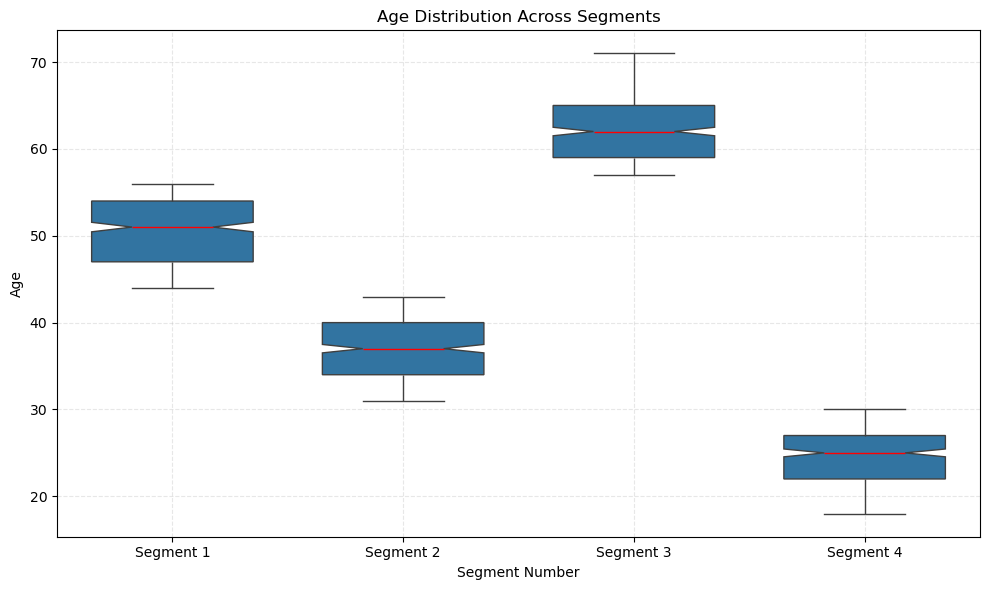

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plot
plt.figure(figsize=(10, 6))

# Create notched box plot with width proportional to sample size
sns.boxplot(x=k4, y=df1['Age'], 
            width=0.7,
            notch=True,
            medianprops=dict(color="red"),
            flierprops=dict(marker='o', markerfacecolor='gray'))

# Customize plot
plt.title('Age Distribution Across Segments')
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust x-axis labels to match segment numbers
plt.xticks(range(4), [f'Segment {i+1}' for i in range(4)])

# Add statistical summary
print("\nAge Statistics by Segment:")
print(df1.groupby(k4)['Age'].describe())

# Perform one-way ANOVA to test for age differences between segments
from scipy import stats
f_stat, p_value = stats.f_oneway(*[group['Age'].values for name, group in df1.groupby(k4)])
print(f"\nOne-way ANOVA results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.4f}")

plt.tight_layout()
plt.show()

## step 8:  Selecting (the) Target Segment(s)

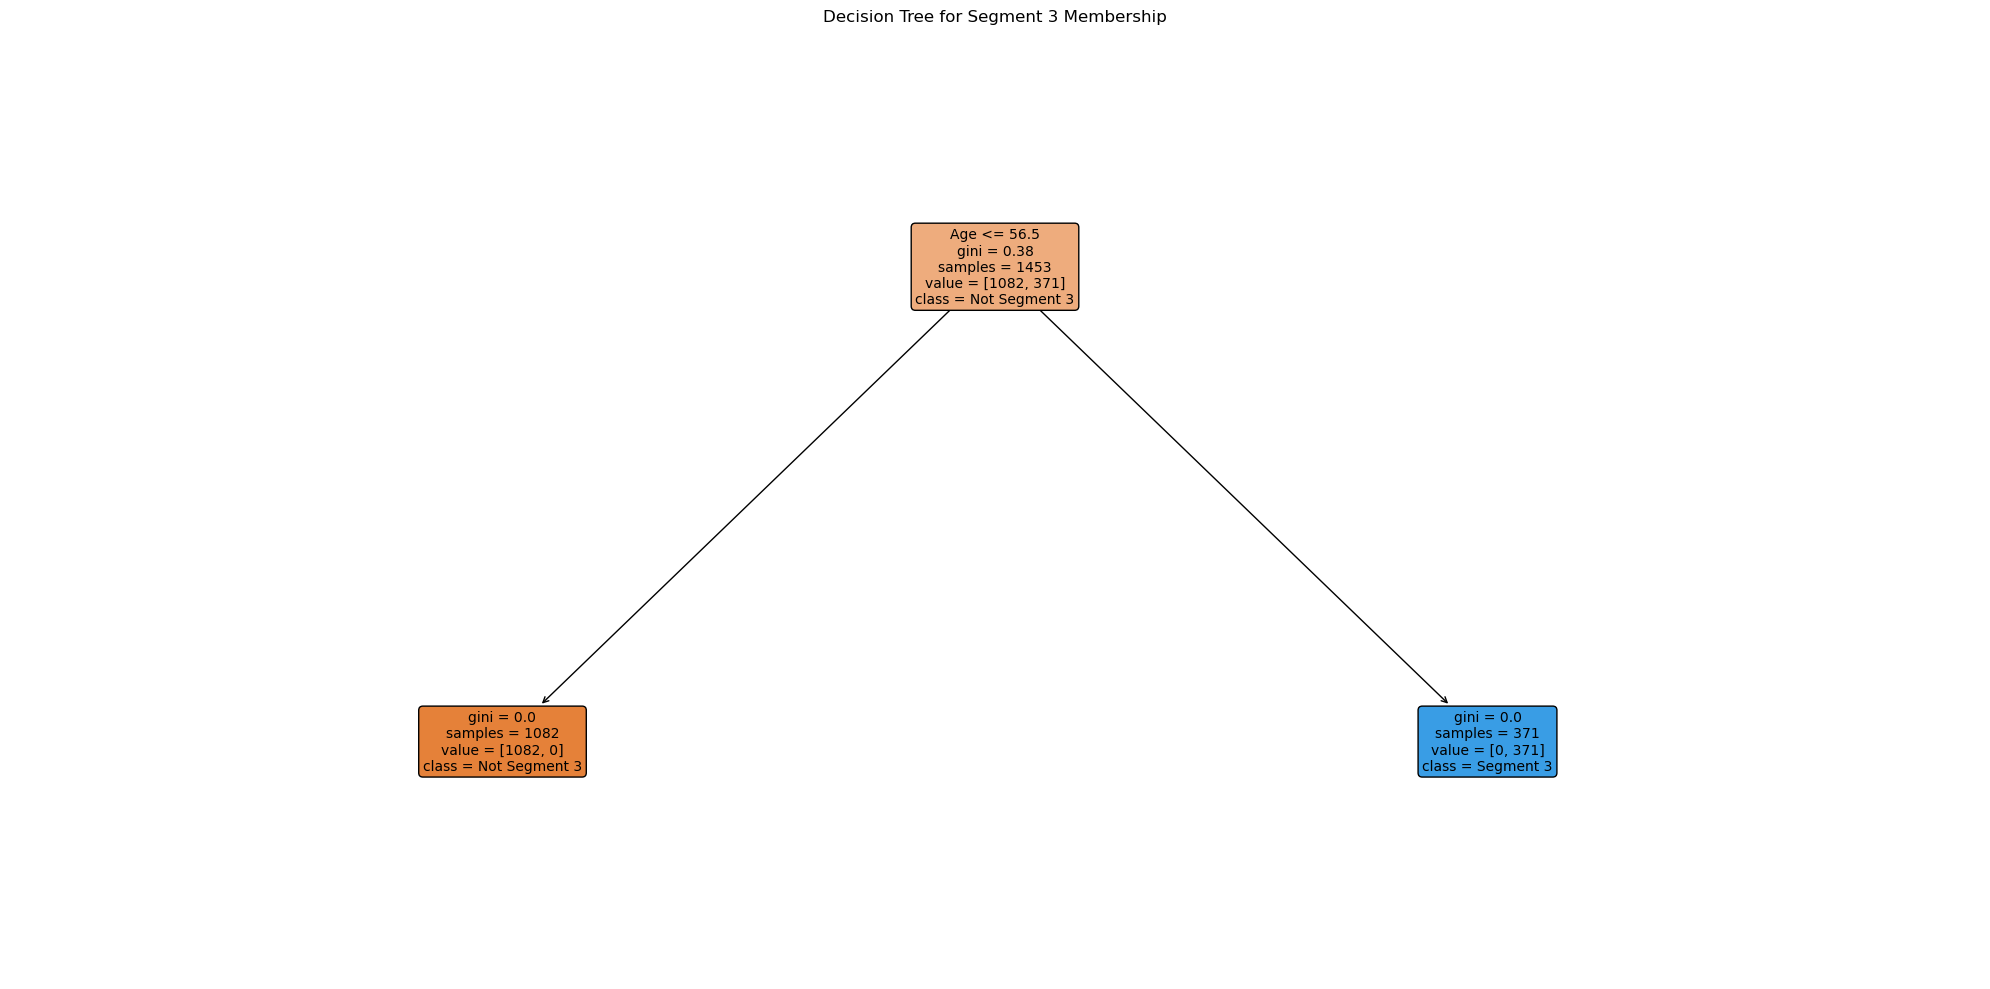


Feature Importance:
                       Feature  Importance
1                          Age         1.0
0                       Like_n         0.0
2     Visit_Every three months         0.0
3  Visit_More than once a week         0.0
4                  Visit_Never         0.0
5           Visit_Once a month         0.0
6            Visit_Once a week         0.0
7            Visit_Once a year         0.0
8                Gender_Female         0.0
9                  Gender_Male         0.0


In [86]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create target variable for segment 3 membership
segment_3 = (k4 == 2).astype(int)  # Note: Python is 0-based, so segment 3 is index 2

# Create dummy variables separately
visit_freq_dummies = pd.get_dummies(df1['VisitFrequency'], prefix='Visit')
gender_dummies = pd.get_dummies(df1['Gender'], prefix='Gender')

# Combine all features
X = pd.concat([
    df1[['Like_n', 'Age']],
    visit_freq_dummies,
    gender_dummies
], axis=1)

# Fit decision tree
tree = DecisionTreeClassifier(
    max_depth=4,  # Limit depth for interpretability
    min_samples_leaf=50,  # Minimum samples in leaf nodes
    random_state=42
)
tree.fit(X, segment_3)

# Create visualization
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=X.columns,
          class_names=['Not Segment 3', 'Segment 3'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree for Segment 3 Membership")
plt.tight_layout()
plt.show()

# Print feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
})
print("\nFeature Importance:")
print(importance.sort_values('Importance', ascending=False))

In [87]:
# Convert VisitFrequency to numeric values (assuming categorical values like 'Never', 'Rarely', etc.)
visit_map = {
    'Never': 1,
    'Rarely': 2,
    'Monthly': 3,
    'Weekly': 4,
    'Daily': 5
}

# Convert to numeric and calculate mean by segment
visit_numeric = df1['VisitFrequency'].map(visit_map)
visit = visit_numeric.groupby(k4).mean()

# Print results with segment labels
print("Mean Visit Frequency by Segment:")
for segment, mean_value in visit.items():
    print(f"Segment {segment + 1}: {mean_value:.2f}")

Mean Visit Frequency by Segment:
Segment 1: 1.00
Segment 2: 1.00
Segment 3: 1.00
Segment 4: 1.00


In [88]:
# Calculate mean Like_n score by segment
like = df1['Like_n'].groupby(k4).mean()

# Print results with segment labels
print("Mean Like Score by Segment:")
for segment, mean_value in like.items():
    print(f"Segment {segment + 1}: {mean_value:.2f}")

Mean Like Score by Segment:
Segment 1: 5.33
Segment 2: 4.74
Segment 3: 5.44
Segment 4: 4.23


In [89]:
# Convert gender to binary (1 for Female, 0 for Male) and calculate mean by segment
female = (df1['Gender'] == 'Female').astype(int).groupby(k4).mean()

# Print results with segment labels
print("Proportion of Females by Segment:")
for segment, mean_value in female.items():
    print(f"Segment {segment + 1}: {mean_value:.2f}")

Proportion of Females by Segment:
Segment 1: 0.55
Segment 2: 0.54
Segment 3: 0.55
Segment 4: 0.53


Visit values: [1. 1. 1. 1.]
Like values: [5.32831325 4.73615635 5.44217687 4.22666667]
Female proportion values: [0.55086849 0.53846154 0.54986523 0.52649007]


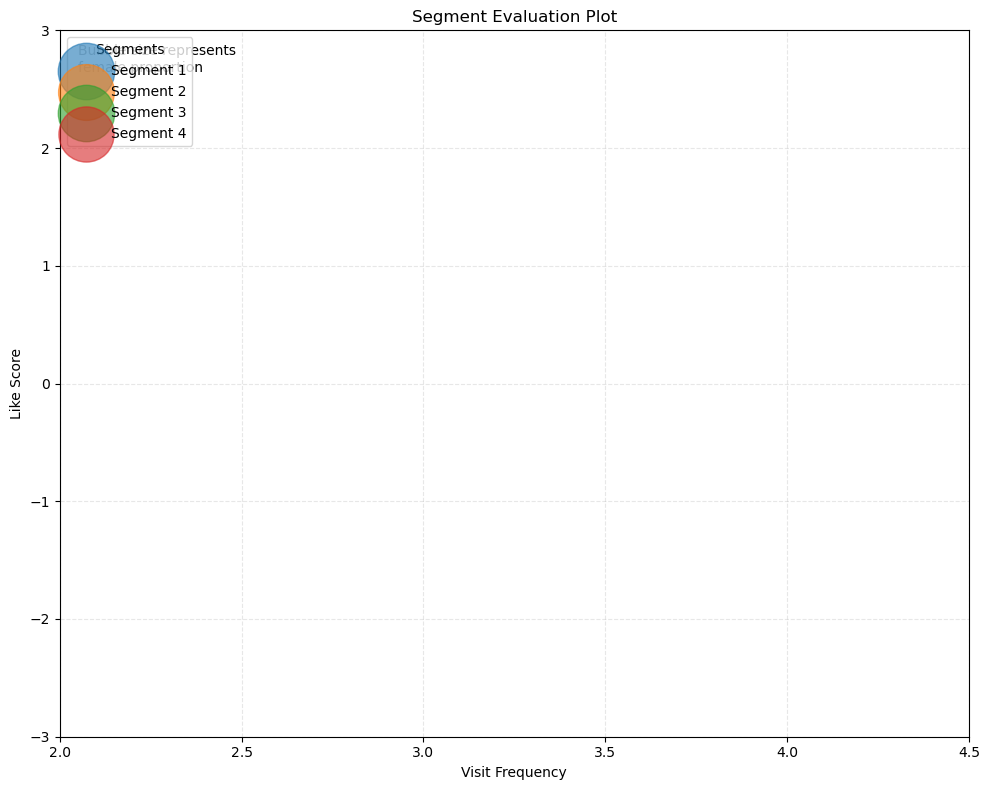

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Define colors for segments
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Convert series to numpy arrays for easier handling
visit_vals = visit.values
like_vals = like.values
female_vals = female.values

# Plot points with size proportional to female proportion and different colors for segments
for i in range(len(visit_vals)):
    plt.scatter(visit_vals[i], like_vals[i], 
                s=female_vals[i]*3000,  # Increased size factor
                alpha=0.6,
                color=colors[i],
                label=f'Segment {i+1}')
    # Add segment labels
    plt.annotate(f'{i+1}', 
                (visit_vals[i], like_vals[i]),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=12,
                fontweight='bold',
                color=colors[i])

# Print values for debugging
print("Visit values:", visit_vals)
print("Like values:", like_vals)
print("Female proportion values:", female_vals)

# Customize plot
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Visit Frequency')
plt.ylabel('Like Score')
plt.title('Segment Evaluation Plot')
plt.grid(True, linestyle='--', alpha=0.3)

# Add legend
plt.legend(title='Segments', loc='upper left')

# Add size reference
plt.text(0.02, 0.98, 'Bubble size represents\nfemale proportion', 
         transform=plt.gca().transAxes,
         verticalalignment='top')

plt.tight_layout()
plt.show()